# MACHINE LEARNING FUNDAMENTALS : LAB TERMINAL
# SUBMITTED BY HASHIM SAJJAD SWATI (FA21-BAI-008)

# Importing libraries and generating our dataset

In [367]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [392]:
rows = 100
cols = 2
X = [[np.random.uniform(-3,3) for j in range(cols)] for i in range(rows)]

In [393]:
y=[0 for i in range(rows)]
for i in range(rows):
  if (X[i][0] + X[i][1])>=0:
    y[i]=1
  else:
    y[i]=0

In [394]:
X =np.asarray(X)
y = np.asarray(y)

# Visualizing the dataset

In [395]:
df = pd.DataFrame(X,columns=[['X','Y']])
df['Class'] = y

Text(0, 0.5, 'Y Coordinate')

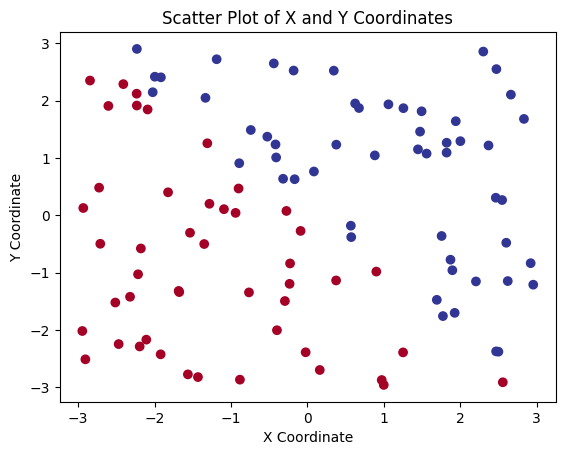

In [396]:
plt.scatter(df['X'], df['Y'], c=df['Class'], cmap='RdYlBu', marker='o')
plt.title('Scatter Plot of X and Y Coordinates')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

# Creating our perceptron class
its activation function is sigmoid


In [397]:
class Perceptron:
      def __init__(self, numberOfInputs):
        self.numberOfInputs = numberOfInputs
        self.weights = [np.random.uniform(-1,1) for i in range(numberOfInputs)]
        self.bias = np.random.rand();

      def sigmoid(self,x):
        return 1 / (1 + np.exp(-x))

      def activationFunction(self,z):
        for i in range(len(z)):
          if self.sigmoid(z[i]) >=0.5:
            z[i]=1
          else:
            z[i]=0
        return z
      def predict(self, x):
          z = np.dot(x, self.weights) + self.bias
          z = self.activationFunction(z)
          return z
      def copy(self):
        newPerceptron = Perceptron(2)
        newPerceptron.weights = self.weights
        newPerceptron.bias = self.bias
        return newPerceptron

# Method For initializing population.
# Each chromosome or individual is an object of our perceptron class, with randomized weights and bias. Number of inputs is 2 according to our dataset

In [398]:
def initializePopulation(size):
  population = [Perceptron(2) for i in range(size)]
  return population


# Defining the fitness function. We can use the accuracy of the perceptron on our dataset here

In [399]:
from sklearn.metrics import accuracy_score
def evalFitness(individual,x,y):
  y_predicted = individual.predict(x)
  loss = accuracy_score(y,y_predicted)
  return loss


# Method to select the best(50) individuals based on their fitness probablity

In [400]:
def selectIndividuals(population, fitness_scores):
  probabilities = fitness_scores / np.sum(fitness_scores)

  selected_indices = np.random.choice(range(len(population)), size=50, p=probabilities)

  selected_individuals = [population[i] for i in selected_indices]

  return selected_individuals

# Crossover method: A random point is selected and parent1's genetic information is behind the point and parent2's genetic information is after the point
For the bias's , we can simply take average

In [401]:
def crossover(parent1, parent2):

    # Perform crossover at a random point
    crossover_point = np.random.randint(0, parent1.numberOfInputs)

    # Create a new perceptron by combining weights and bias
    newPerceptron = Perceptron(parent1.numberOfInputs)
    newPerceptron.weights = parent1.weights[:crossover_point] + parent2.weights[crossover_point:]
    newPerceptron.bias = (parent1.bias + parent2.bias) / 2

    return newPerceptron

# Mutation: there is a chance that weight or bias might mutate

In [402]:
def mutation(child,mutation_rate):
  mutatedchild = child.copy()
  for weight in mutatedchild.weights:
    if np.random.rand()<mutation_rate:
      weight += np.random.uniform(-0.1,0.1)

  if np.random.rand()<mutation_rate:
    child.bias += np.random.uniform(-0.1,0.1)
  return mutatedchild;

#method that generates new generation

In [403]:
def generateNewGeneration(selectedIndividuals, mutation_rate):
  newGeneration = []
  generatedChildren=[]
  # if odd number of individuals, add a random individual again to make pairing possible
  if len(selectedIndividuals)%2 !=0:
    randomIndividual = np.random.choice(selectedIndividuals)
    selectedIndividuals.append(randomIndividual)
  i =0
  # generating pairs
  while i < len(selectedIndividuals)-1:
    parent1 = selectedIndividuals[i]
    i+=1
    parent2 = selectedIndividuals[i]
    i+=1
    #passing pairs for crossover
    child = crossOver(parent1,parent2)
    # passing offspring for mutation
    mutatedChild = mutation(child,mutation_rate)
    # adding it to list of all generated offspring
    generatedChildren.append(mutatedChild)
    # adding all parents to the new generation and the offspring
    for parent in selectedIndividuals:
      newGeneration.append(parent)
    for child in generatedChildren:
      newGeneration.append(child)

  return newGeneration

# Method that makes it all come together

In [404]:
def geneticAlgorithm(X,Y,populationSize,numberOfGenerations,mutation_rate):

# initializing the population
  population = initializePopulation(populationSize)

  newGeneration=[]
# current generation set to initial population
  currentGeneration =population

  for i in range(numberOfGenerations-1):
    fitness = []
    # For each individual in current gen, eval and record fitness
    for individual in currentGeneration:
      fitness.append(evalFitness(individual,X,Y))
    # Select individuals
    selectedIndividuals = selectIndividuals(currentGeneration,fitness)
    #Generate new generation
    newGeneration = generateNewGeneration(selectedIndividuals,mutation_rate)
    #Current gen set to new generation
    currentGeneration = newGeneration
    print("iteration: ",i," , Mean Fitness of generation: ", np.mean(fitness))
  maxFitnessIndex=0
  # Finding the best fitness perceptron in last generation
  for i in range(len(fitness)):
    if fitness[i] > fitness[maxFitnessIndex]:
      maxFitnessIndex= i
  print("Best offspring's fitness: ",evalFitness(currentGeneration[maxFitnessIndex],X,Y))

  return currentGeneration[maxFitnessIndex]


#updating the weights of a created perceptron to the best one

In [405]:
perceptron= Perceptron(2)
perceptron=geneticAlgorithm(X,y,50,20,0.01)

iteration:  0  , Mean Fitness of generation:  0.452
iteration:  1  , Mean Fitness of generation:  0.6506730158730158
iteration:  2  , Mean Fitness of generation:  0.7246539682539682
iteration:  3  , Mean Fitness of generation:  0.760711111111111
iteration:  4  , Mean Fitness of generation:  0.7600952380952382
iteration:  5  , Mean Fitness of generation:  0.7523047619047618
iteration:  6  , Mean Fitness of generation:  0.7764190476190476
iteration:  7  , Mean Fitness of generation:  0.7943619047619047
iteration:  8  , Mean Fitness of generation:  0.8094476190476191
iteration:  9  , Mean Fitness of generation:  0.8156571428571427
iteration:  10  , Mean Fitness of generation:  0.8084063492063492
iteration:  11  , Mean Fitness of generation:  0.816831746031746
iteration:  12  , Mean Fitness of generation:  0.8084126984126984
iteration:  13  , Mean Fitness of generation:  0.8206857142857142
iteration:  14  , Mean Fitness of generation:  0.8286095238095238
iteration:  15  , Mean Fitness of g

#Incremental increase in mean fitness is visible above

In [406]:
perceptron.weights

[0.37377545111418375, 0.49280521840894564]

In [407]:
evalFitness(perceptron,X,y)

0.85